# Cellular_expand - a function that allows to detect pixels shaded by a cloud in a temperature field

A matrix which allows to divide matrix cells into groups (for example, the biome matrix) is required for the algorithm to work correctly.

In [1]:
from SSGPToolbox.Preparators.common_functions import cellular_expand

In [2]:
# Additional inputs
import os
import numpy as np

from matplotlib import pyplot as plt
from matplotlib import cm
from pylab import rcParams
rcParams['figure.figsize'] = 11, 6

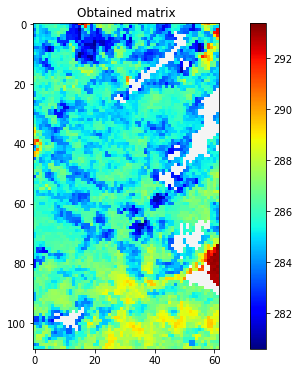

In [3]:
# Load the matrix
matrix = np.load(os.path.join(os.pardir, 'Samples', 'S3LST_preparation_example','prepared','20190831T194258.npy'))

masked_array = np.ma.masked_where(matrix == -100.0, matrix)
cmap = cm.get_cmap('jet')
cmap.set_bad(color='#F4F4F4')
plt.imshow(masked_array, interpolation = 'nearest', cmap = cmap)
plt.colorbar()
plt.title('Obtained matrix')
plt.show()

#### Parameters:

* matrix --- a matrix with a parameter to be analyzed
* biome_matrix --- matrix which allows to divide matrix cells into groups
* gap --- gap code value, DEFAULT -100.0
* iter --- amount of iterations, DEFAULT 10

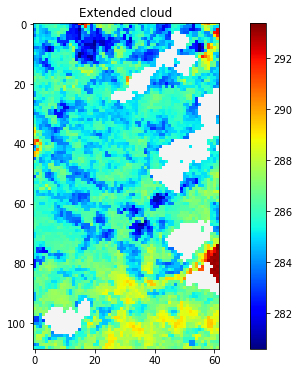

In [4]:
biome_matrix = np.load(os.path.join(os.pardir, 'Samples', 'S3LST_preparation_example','prepared', '20190831T194258_biomes.npy'))

# Applying the algorithm for 50 iterations
new_matrix = cellular_expand(matrix, biome_matrix, gap = -100.0, iter = 50)

masked_array = np.ma.masked_where(new_matrix == -100.0, new_matrix)
cmap = cm.get_cmap('jet')
cmap.set_bad(color='#F4F4F4')
plt.imshow(masked_array, interpolation = 'nearest', cmap = cmap)
plt.colorbar()
plt.title('Extended cloud')
plt.show()

#### The demonstration of the algorithm 
 
![Demonstration.gif](https://raw.githubusercontent.com/Dreamlone/SSGP-toolbox/master/Supplementary/animations/CA_animation.gif)
